# Final project
## Part 1: Introduction - defining the problem and the dataset
### Introduction
Most people nowadays listen to their favorite songs using streaming services such as Spotify, Apple Music or Youtube. This amounts to a magnitude of data produced by users listening activities. Songs themselves can be analyzed by their tangible characteristics, such as tempo, key or duration. Going even further, Spotify introduced a tool for analyzing more subjective metrics, such as song "danceability", " liveness" or "acousticness". This data about specific tracks, combined with their user interaction metrics, can be useful in order to predict why some tracks get more streams. This could be useful to new artists planning to publish their songs to Youtube or Spotify in order to know where to shift their focus: getting most comments, shares, likes or even writing songs in specific tempos. 
### Research question
This project's aim is to find whether the **popularity of tracks on Youtube is correlated to any song-defining characteristics from Spotify or user interaction metrics on Youtube**. After finding out which factor most influences stream counts, I hope to build a model for predicting high streams.
### Describing the dataset
The dataset **Spotify_Youtube.csv** was obtained from Kaggle as a joint dataset, combining data from Spotify and Youtube for the same tracks. The data has been obtained on the 7th of February, 2023. There are 26 variables, which are explained below:
- **Track**: name of the song, as visible on the Spotify platform.
- **Artist**: name of the artist.
- **Url_spotify**: the Url of the artist.
- **Album**: the album in wich the song is contained on Spotify.
- **Album_type**: indicates if the song is relesead on Spotify as a single or contained in an album.
- **Uri**: a spotify link used to find the song through the API.
- **Danceability**: describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **Energy**: is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
- **Key**: the key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- **Loudness**: the overall loudness of a track in decibels (dB). Values typically range between -60 and 0 db.
- **Speechiness**: detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
- **Acousticness**: a confidence measure from 0.0 to 1.0 of whether the track is acoustic.
- **Instrumentalness**: predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
- **Liveness**: detects the presence of an audience in the recording. A value above 0.8 provides strong likelihood that the track is live.
- **Valence**: a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- **Tempo**: the overall estimated tempo of a track in beats per minute (BPM). 
- **Duration_ms**: the duration of the track in milliseconds.
- **Stream**: number of streams of the song on Spotify.
- **Url_youtube**: url of the video linked to the song on Youtube.
- **Title**: title of the videoclip on youtube.
- **Channel**: name of the channel that have published the video.
- **Views**: number of views. Can range from 0 to 8 billion.
- **Likes**: number of likes.
- **Comments**: number of comments.
- **Description**: description of the video on Youtube.
- **Licensed**: Indicates whether the video represents licensed content, which means that the content was uploaded to a channel linked to a YouTube content partner and then claimed by that partner.
- **official_video**: boolean value that indicates if the video found is the official video of the song.

The first metrics are obtained from Spotify and last 9 are from Youtube. There are **overall 20 000 entries** which makes the dataset too complex to analyze alltogether. Therefore, **only numerical features will be used for analysis** and no more than 700 rows will be used for training. 
## Part 2: Preprocessing and feature analysis
### Extracting the dataset

First task at hand is to get a list of numerical column names to read the dataset succesfully. For this I only read 2 rows of the dataset and iterate over the columns to pop string ones out. Having the list of column names, I also remove some irrelevant features, such as the index column and boolean columns.

In [115]:
# Let's import our dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = './Spotify_Youtube.csv'
df = pd.read_csv(file_path, nrows=2) #get the first 2 rows

# iterate over the columns and pop all string columns (which are defined as object types in pandas)
for col in df.select_dtypes(include=['object']).columns:
    df.pop(col)

column_names = list(df.columns)

column_names.remove('Unnamed: 0') #irrelevant feature: index
column_names.remove('official_video') #irrelevant feature: boolean
column_names.remove('Licensed') #irrelevant feature: boolean
column_names.remove('Duration_ms') #irrelevant feature: duration of song is irrelevant
column_names.remove('Stream') #redundant: we are already predicting 'Views', so 'Streams' is redundant

print(column_names)


['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Views', 'Likes', 'Comments']


As I now have the list of features I want to read, I can extract the dataset. 

In [116]:
#now we know which attributes are relevant and read as many rows as we want succesfully
df = pd.read_csv(file_path, nrows=700, usecols=column_names)
#also moving Views to front for easier data manipulation later
column_to_move = df.pop("Views")
df.insert(0, "Views", column_to_move)
df.head()

,Views,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Likes,Comments
0,693555221.0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,6220896.0,169907.0
1,72011645.0,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,1079128.0,31003.0
2,8435055.0,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,282142.0,7399.0
3,211754952.0,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,1788577.0,55229.0
4,618480958.0,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,6197318.0,155930.0


### Dealing with missing data
The next step is to remove missing values. In this case, videos with 0 views, likes or comments are considered irrelevant and removed at this step too.

In [117]:
#seeing nAn values in columns
df = df.replace('0.0',np.NaN)

print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))

print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Number of instances = 700
Number of attributes = 13
Number of missing values:
	Views: 17
	Danceability: 0
	Energy: 0
	Key: 0
	Loudness: 0
	Speechiness: 0
	Acousticness: 0
	Instrumentalness: 0
	Liveness: 0
	Valence: 0
	Tempo: 0
	Likes: 19
	Comments: 17


As only a small number of rows had 0 in them, I could afford to just delete them from the dataset.

In [118]:
#deleting the instances with nAn
print('Number of rows in original data = %d' % (df.shape[0]))

df = df.dropna()
print('Number of rows after discarding missing values = %d' % (df.shape[0]))
#df.count()

Number of rows in original data = 700
Number of rows after discarding missing values = 681


In [119]:
df1 = df #creating a duplicate dataset

### Distribution of data
Immediatly at looking at the characteristics of the dataset, it is prominent that the column "Views" has much higher variance than other columns. This is also seen with features "Likes" and "Comments".

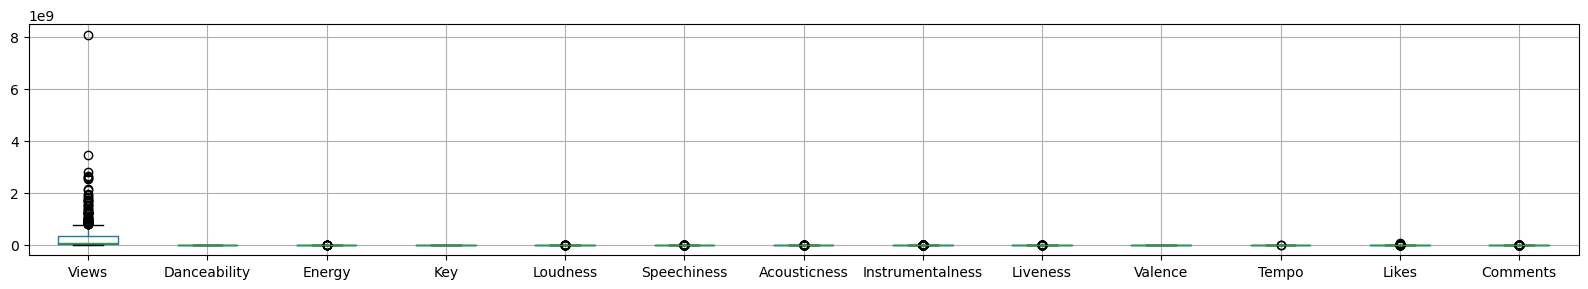

In [120]:
df1.boxplot(figsize=(20,3))
plt.show()

The boxplot shows how the extreme variation of views skews the visualisation of other boxplots. The max of "Views" is 8 079 646 911, the min is 1192 and the median is 83 575 838. Same problem, but not as extreme, exists with "Likes" and "Comments". Most other features are distributed between 0 and 1.

In [121]:
print("The min, max and median of Views:")
print(df1['Views'].min()) # 1192
print(df1['Views'].max()) # 8 079 646 911
print(df1['Views'].median()) #mean: 263 742 900   median: 83 793 080
print("The min, max and median of Likes:")
print(df1['Likes'].min()) # 22
print(df1['Likes'].max()) # 9 415 668
print(df1['Likes'].median()) #588 273
print("The min, max and median of Comments:")
print(df1['Comments'].min()) # 0.01
print(df1['Comments'].max()) # 525 670
print(df1['Comments'].median()) #17 306

The min, max and median of Views:
524.0
8079646911.0
83793080.0
The min, max and median of Likes:
18.0
50788626.0
587832.0
The min, max and median of Comments:
0.0
4252791.0
17399.0


This has a great risk of affecting the data prediction model. The first step to deal with this is to **set a boundary for maximum views** to predict. This makes sense if we consider that songs with 8 billion streams are somewhat an exception.
So let's say we are predicting videos **up until 800k views** and delete any rows with higher counts.

Number of rows after discarding high view counts = 628


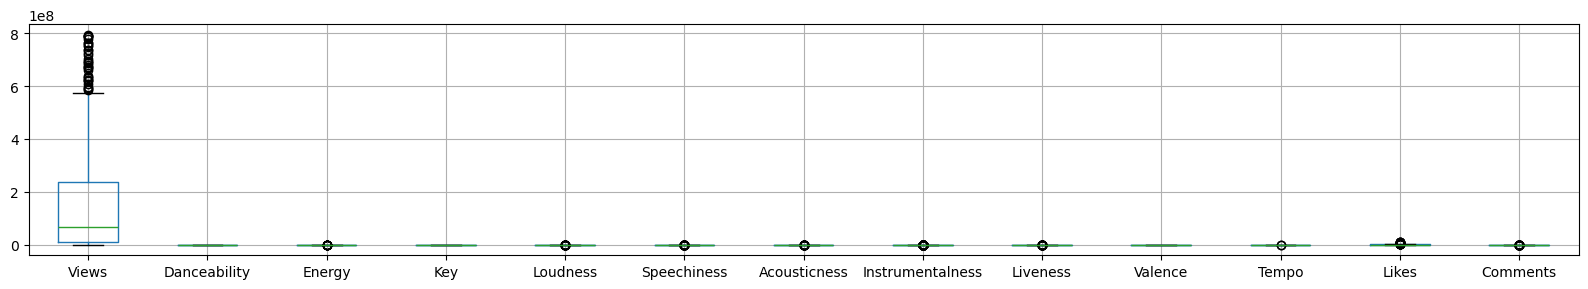

In [122]:
#first we are "subsampling" the dataset to include entries with under 800 thousand views.
df1 = df1[df1['Views'] < 800000000]
#print(df1['Views'].max())
print('Number of rows after discarding high view counts = %d' % df1.shape[0])
#sns.boxplot(data=df1)
df1.boxplot(figsize=(20,3))
plt.show()


### Reducing outliers
I also reduce any outliers before moving on. To do this, I compute the Z-score for each attribute in the dataset and standartize. Next, I discard the columns with Z > 3 or Z <= -3 and apply the filtered rows back to original dataset.

In [123]:
Z = (df1-df1.mean())/df1.std()

# selecting rows whose value is between -3 and 3
# then adding up all those rows across (axis=1) the columns
Z_filtered = Z.loc[((Z > -3).sum(axis=1)==Z.shape[1]) & ((Z <= 3).sum(axis=1)==Z.shape[1]),:]

print('Number of rows before discarding outliers = %d' % df1.shape[0])
# Use the index of Z_filtered to filter df
df1 = df1.loc[Z_filtered.index]

print('Number of rows after discarding outliers = %d' % df1.shape[0])

Number of rows before discarding outliers = 628
Number of rows after discarding outliers = 549


### Log transformation

However, since discarding rows with high views has not helped a lot, I have decided to go with another approach. Logarithmic transformation is a commonly used data preprocessing and exploration technique in data science. It helps reduce outliers, get a more normalized distribution of our data and therefore build a better model. Basically, it can **reduce the impact of extreme values on our model and compress the range of values, resulting in more accurate predictions**. For this, I decided to use **log10 transformations for the chosen regressor Views**, and the **likely regressand Likes**

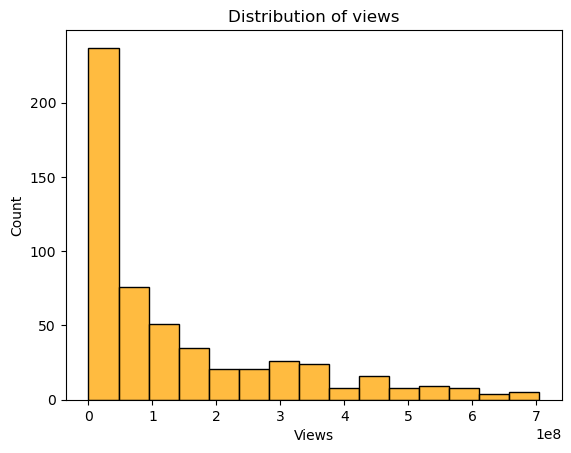

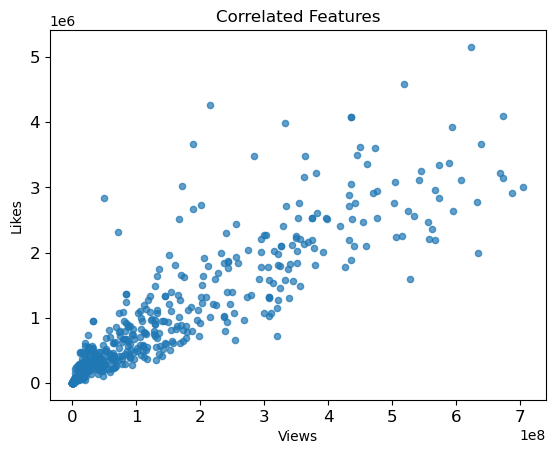

In [124]:
plt.clf()
sns.histplot(df1.Views, bins='auto', color='orange');
plt.title('Distribution of views')
plt.xlabel('Views')
plt.ylabel('Count')
plt.show()

df1.plot(x='Views', y='Likes', 
        kind='scatter',title='Correlated Features',fontsize=12, alpha=0.7)

plt.show()

Here I visualise the distribution of "Views" and also the correlation between "Views" and "Likes". The histogram shows how "Views" distribution is obvioulsy far from normal, while the the correlation is favorable, yet not perfect. Now I try to visualise the same but with Log10 transformed variables:

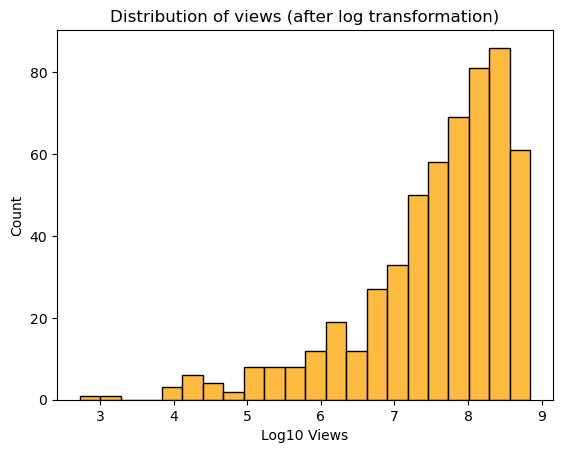

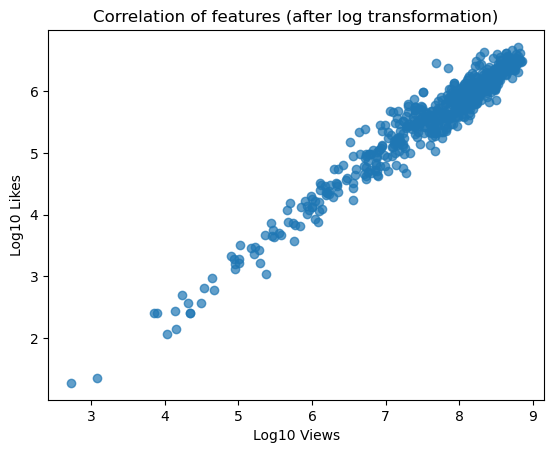

In [125]:
#create temporary log variables for visualization
log_views = np.log10(df1['Views'] + 1)
log_likes = np.log10(df1['Likes'] + 1)

sns.histplot(log_views, bins='auto', color='orange')
plt.title('Distribution of views (after log transformation)')
plt.xlabel('Log10 Views')
plt.ylabel('Count')
plt.show()

plt.scatter(log_views, log_likes, alpha=0.7)
plt.title('Correlation of features (after log transformation)')
plt.xlabel('Log10 Views')
plt.ylabel('Log10 Likes')
plt.show()

Though not perfect, the distribution is much better. The correlation has improved too, now almost looking linear. However, I will only apply these transformations right before building the dataset and after doing feature analysis.
## Feature analysis
As I have chosen 'Views' as my regressand, I apply the F-test to find the best feature. The results are as I predicted, which is the feature "Likes", so it will become my regressor in the polynomial model.

In [126]:
from sklearn.feature_selection import SelectKBest, f_regression

sampleData_Y = df1.loc[:,'Views']
sampleData_X = df1.loc[:,'Danceability':'Comments']
k=1 # set the number of best-feature under scrutiny to 2

# create a handle to the feature selector
selector = SelectKBest(f_regression,k=k)

# fit to our sample data
selector.fit(sampleData_X, sampleData_Y)

# computes the best features (2 of them, because K=2)
best_feats = selector.get_support(indices=True)

# select the two columns corresponding to the best features
xTrain_best = sampleData_X.iloc[:,best_feats]

# show the best 2 features computed so far
xTrain_best.head()


,Likes
1,1079128.0
2,282142.0
3,1788577.0
5,1844658.0
6,11686.0


# Part 3: Building the polynomial regression model
## Model tuning
The first step to building a good polynomial model is to find out the best polynomial degree. Therefore in this section I:

- Extract the regressand and regressor and apply log10 transformation for both variables
- Split them into training and testing datasets
- Train the model and test it in degrees 1 - 9
- For each model, computate the R2 score and the mean square error
- Visualise the error functions
- Based on the functions, decide the best polynomial degree for my model

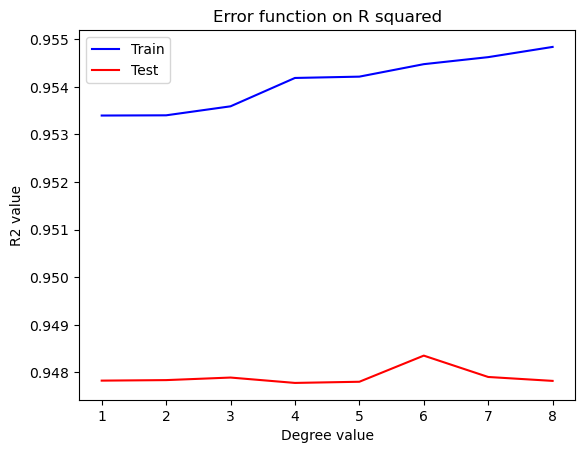

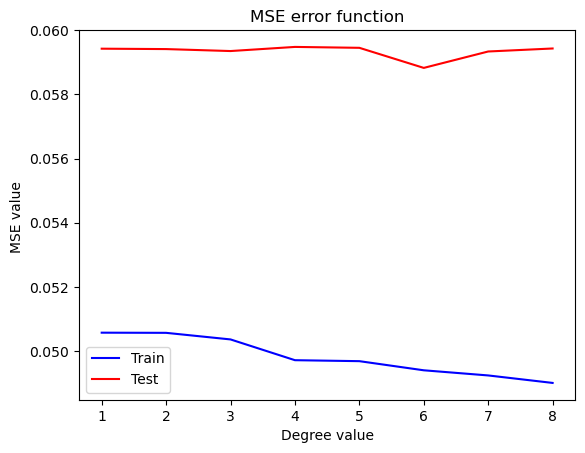

Best degree polynomial train accuracy:  0.9548390796985936  at index:  8
Best degree polynomial test accuracy:  0.9483523295356896  at index:  6
MSE test score at degree 6:  0.059428339883783605
MSE train score at degree 6:  0.04901255781889488


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = np.log10(df1['Likes'].values.reshape(-1, 1) + 1)  # Log-transform Likes
y = np.log10(df1['Views'].values + 1)      

xTrain, xTest, yTrain, yTest = train_test_split(X, #features = level
                                                y, #response variable = salary
                                                test_size=0.33, # 30% samples for testing
                                                random_state=42)

r_values_test = []
r_values_train = []
mse_values_test = []
mse_values_train = []

for i in range(1, 9):
    #TRAIN SET
    poly_regression = PolynomialFeatures(degree = i)
    X_poly = poly_regression.fit_transform(xTrain) #train data

    lin_regression = LinearRegression()
    lin_regression.fit(X_poly, yTrain) #poly X, train data
    
    y_predicted_values = lin_regression.predict(X_poly)
    
    #computing the MSE score and R2 FOR TRAIN DATA
    mse = mean_squared_error(yTrain, y_predicted_values)
    mse_values_train.append(mse)

    r_squared = r2_score(yTrain, y_predicted_values)
    r_values_train.append(r_squared)

    #Compute the test predictions with the alerady fitted model
    X_poly_test = poly_regression.transform(xTest)
    y_test_pred = lin_regression.predict(X_poly_test)

    #MSE score and R2 FOR TEST DATA
    mse = mean_squared_error(yTest, y_test_pred)
    mse_values_test.append(mse)
    
    r_squared = r2_score(yTest, y_test_pred)
    r_values_test.append(r_squared)

plt.clf()
plt.plot(range(1, 9) ,r_values_train, label='Train', color='blue')
plt.plot(range(1, 9) ,r_values_test, label='Test', color='red')
plt.title('Error function on R squared')
plt.xlabel('Degree value')
plt.ylabel('R2 value')
plt.legend(loc='best')
plt.xticks(range(1, 9))
plt.show()


plt.plot(range(1, 9) ,mse_values_train, label='Train',color='blue')
plt.plot(range(1, 9) ,mse_values_test, label='Test',color='red')
plt.title('MSE error function')
plt.xlabel('Degree value')
plt.ylabel('MSE value ')
plt.legend(loc='best')
plt.xticks(range(1, 9))
plt.show()


maxTest = max(r_values_test)
maxTrain = max(r_values_train)


print("Best degree polynomial train accuracy: ", maxTrain , " at index: ", r_values_train.index(maxTrain) + 1)
print("Best degree polynomial test accuracy: ", maxTest, " at index: ", r_values_test.index(maxTest) + 1)
print("MSE test score at degree 6: ", mse_values_test[7])
print("MSE train score at degree 6: ", mse_values_train[7])

It is obvious that the best poly degree for this model would be 6, as validation score reaches the maximum before dropping down and becoming overfitting, while training score gets higher. The train R2 score of degree 6 is 0.95 while the test accuracy is about 0.94, which is really great results. The MSE value is also great at degree 6, with both the training and the testing errors only being 0.05, or 5%, which means the model was 95% accurate. This is sufficient. Run down:

- R2 score for testing is 0.94
- R2 socre for training is 0.95
- The chosen polynomial degree is 6
- MSE value at degree 6 is 95% accuracy

## Model validation
Next I do ten-fold cross validation for actual model validation. The result is a **mean score is 0.947**, which is optimal. Since the 10 score values are also quite consistent, ranging **between 0.93 to 0.97**, the model generalizes well.

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

#transform the X with poly function
poly_regression = PolynomialFeatures(6)
X_poly = poly_regression.fit_transform(X)

lin_regression = LinearRegression()

scores = cross_val_score(lin_regression, X_poly, y, cv=10) # move this first before training the model and dont fit

print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.94482869 0.93635638 0.95384867 0.93930958 0.93780664 0.9446313
 0.96043908 0.97073284 0.93761364 0.95050606]
Mean Score: 0.947607286617129


## Training the polynomial model
In this section, I train the polynomial model on the whole set.

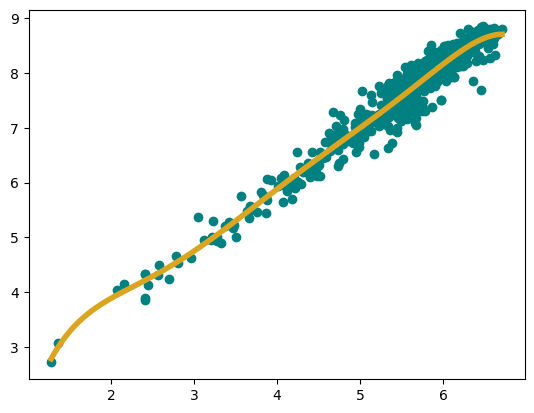

In [129]:
#TRAIN THE ENTIRE SET!!

lin_regression.fit(X_poly, y) #poly data to train

y_predicted_values = lin_regression.predict(X_poly)

#generating dense points to create a smoother curve to show polynomial
X_dense = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
X_dense_poly = poly_regression.transform(X_dense)
y_dense_predicted = lin_regression.predict(X_dense_poly)

plt.scatter(X,y,color='teal')
plt.plot(X_dense, y_dense_predicted, color='goldenrod', linewidth=4)
plt.show()

It is obvious that the model is not too complex and could even have been expressed in linear regression. However, in this situation I wanted to try out if polynomial regression can improve accuracy even with a clearly linear correlation.
## Result interpretation
To actually interpret the model's predictions though, there is one last step to the pipeline. As I have transformed both the dependant and independant to log10, the model predicts in log10 variables too. To get the actual estimates, these predicted variables need to be reversed by exponential function 10 **. 

In [130]:
likes_count = 677 # Example data
log_likes_count = np.log10(likes_count + 1)

# poly X transformation nd prediction
X_poly = poly_regression.transform([[log_likes_count]])
predicted_views_log = lin_regression.predict(X_poly)

# reverse log transformation
predicted_views = (10 ** predicted_views_log) - 1

print(f"Predicted Views for {likes_count} Likes: {np.round(predicted_views, 0)}")


Predicted Views for 677 Likes: [38361.]


As seen here, the model predicts that for a video of **677 likes**, it could have **38 361 views**. It's not perfect and the meaning could have been lost while transforming variables to log10 and back with exponentials, but it is sufficient.

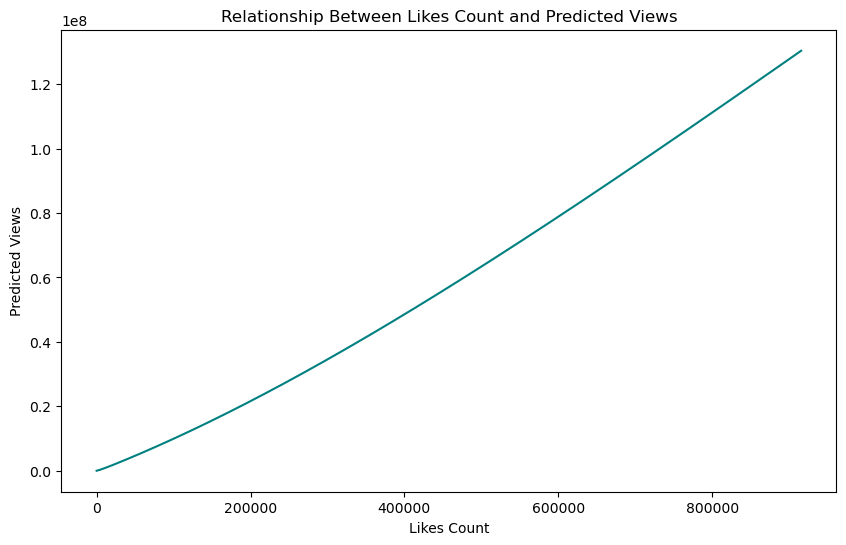

In [131]:
# Generate a range of likes counts for plotting
likes_counts = range(22, 915668, 400)
predicted_views_list = []

for likes in likes_counts:
    log_likes = np.log10(likes + 1)
    X_poly = poly_regression.transform([[log_likes]])
    predicted_views_log = lin_regression.predict(X_poly)
    predicted_views = (10 ** predicted_views_log) - 1
    predicted_views_list.append(predicted_views[0])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(likes_counts, predicted_views_list, label="Predicted Views", color="teal")
plt.xlabel("Likes Count")
plt.ylabel("Predicted Views")
plt.title("Relationship Between Likes Count and Predicted Views")
plt.show()

The graph shows a perfect linear relationship between predicted views for likes. It resembles the correlation graph of the original data. Ofcourse, it is not perfect, as the correlation has much more variance at low variables.

# Part 4: Reflection

For a simple dataset like this with very strong correlations between some of the variables, it was not hard to build a model. Ofcourse, I was wishing to find more interesting and unexpected correlations, for example, whether song speechiness or liveness could affect the track's popularity. However, to my disappointment, that was not the case. Though that should have been expected, because song popularity is very subjective and unpredictable, and it is usually influenced by the artist's fame and not the song properties.
Nevertheless, I still challenged myself in another way, which was to transform the dataset using a log10 transformation. Though this definitely helped with data normalcy and building a better model, it had its weak points - like how the prediction is very positive for videos with low likes. I believe some of the meaning was lost in the transformation and exponential reversal. Yet, this definitely made this model much more interesting and fun to program and analyse. If I had more statistical knowledge about residuals and error rates, perhaps I could have carried out a more thourough analysis of transforming the data.